# 3. C programming

The following code is needed only if you are using the notebook, because <tt>make</tt> command treats spaces and TAB characters differently.  We need to be able to reconfigure Jupyter to treat TABS as characters, not replace them with 4 spaces, as it does by default.

# Note on Code
This code below defines a function, when called, sets the indent style in CodeMirror instances to use tabs. 
It first checks if an argument use_tabs is provided; if not, it defaults to using tabs. 
It then applies this setting to all existing CodeMirror instances in the notebook and ensures that future instances will also use tabs for indentation. 
At the end, it calls the function to apply settings.

In [1]:
%%javascript
// Defined a function called 'IPython.tab_as_tab_everywhere'

IPython.tab_as_tab_everywhere = function(use_tabs) {

    // If 'use_tabs' argument is not provided, set it to true by default
    if (use_tabs === undefined) {
        use_tabs = true;
        }

    // This applies the setting to all current CodeMirror instances in the notebook
    IPython.notebook.get_cells().map(
        function(c) {  return c.code_mirror.options.indentWithTabs=use_tabs;  }
        );

    // This makes sure new CodeMirror instances created in the future also use this setting
    CodeMirror.defaults.indentWithTabs=use_tabs;
    };

// Calls the function
IPython.tab_as_tab_everywhere()

<IPython.core.display.Javascript object>

## Gaussian packet evolution: a C project

This is the first homework to be handed in, a week-long project to graphically illustrate what happens to a Gaussian wave packet (we will make it up by adding a few individual waves) impacting on a barrier. We want to observe how some of the packet is reflected, and some undergoes quantum-mechanical tunneling, so both a reflected and a transmitted packet emerges after the impact.  We will run the program repeatedly, changing the number of wave making up the packet, the number of points to plot, the initial energy of the incoming packet, etc. The physics of this scattering process will get discussed next, but first let's set up the mechanics of the new project:
<ul>
	<li>make a project subdirectory
	<li>create a basic skeleton of a program that can read and parse user input (though does not compute anything at first)
	<li>have a basic Makefile in place
</ul>
<p>
The second part of the homework is to try to figure out what is going on in an old Fortran program that does the same thing. We do not know either Fortran or C syntax, but hopefully the computational content, i.e. the algorithmic core, will be self-explanatory. The task is to "port", or convert this old code to C, and learn some basic C programming in the process.

# Note on Code
The code below creates a directory named 5P10 in the home directory if it doesn't exist.
Then it removes any existing directory named packet, and then creates a new directory called packet

In [2]:
%%bash
## start with an empty directory for the project

# Checks if directory ~/5P10 exists and if it doesn't exist, creates it
if [ ! -d ~/5P10 ]; then
  mkdir ~/5P10
fi

# Changes the current working directory to ~/5P10
cd ~/5P10

#overwriting the packet file

# removes the packet
rm -rf packet

#remakes the packet 
mkdir packet

In [3]:
%cd ~/5P10/packet #changes the present working directory to ~/5P10/packet

[Errno 2] No such file or directory: '/Users/hitenpatel/5P10/packet #changes the present working directory to ~/5P10/packet'
/Users/hitenpatel/Downloads


In [4]:
%%bash 
pwd   # Prints the current working directory (pwd)
ls -l # Lists all files and directories in the current directory

/Users/hitenpatel/Downloads
total 6401256
-rw-r--r--@ 1 hitenpatel  staff      134675 28 Sep 00:07 03-Cprogramming.ipynb
-rw-r--r--@ 1 hitenpatel  staff       27027 23 Sep 00:43 327097698_1761155594278249_3314764948244787907_n.jpg
-rw-r--r--@ 1 hitenpatel  staff       45294 11 Sep 00:28 7yphlf.jpg
-rw-r--r--@ 1 hitenpatel  staff    17975343 22 Sep 00:55 Full.pdf
-rw-r--r--@ 1 hitenpatel  staff    28387622 23 Sep 19:34 Hartle,Gravity.pdf
-rw-r--r--@ 1 hitenpatel  staff      880429  4 Sep 18:41 IMG_3059-modified (1).png
-rw-r--r--@ 1 hitenpatel  staff     2345011  4 Sep 18:40 IMG_3059-modified.png
-rw-r--r--@ 1 hitenpatel  staff      141061 29 Aug 20:02 Jaskaran.pdf
-rw-r--r--@ 1 hitenpatel  staff       45325 29 Aug 20:03 Jaskaran.pptx
-rw-r--r--@ 1 hitenpatel  staff     5991995 22 Sep 17:24 MacBook Pro 16_ - 1.png
-rw-r--r--@ 1 hitenpatel  staff      142871 16 Sep 23:19 Medical-Self-Verification-Form-Short-term-less-than-3-days.pdf
-rw-r--r--@ 1 hitenpatel  staff      158347 16 Sep 23:2

## Physics of tunnelling

Review <a href="https://www.physics.brocku.ca/Courses/5P10/Lectures/wavepackets.pdf" target="_blank">these notes from a QM course (PDF)</a>.

Last session, we saw a working Fortran program. The relevant numerical part is this, and the notation is a straightforward translation of the expressions from the PDF notes.  FORTRAN = "FORmula TRANslation".

# Note on Code
This code defines a subroutine named add_wave which calculates and adds a specified wave to a complex storage array P. 

The variables in the code are described as follows:

<ul>
	
<li> x(601): An array of 601 real numbers representing positions or coordinates where the wave function will be calculated. </li>
<li> E: A real number representing the energy level of the wave. </li>
<li> P(601): An array of complex numbers representing the complex storage array where the wave will be added. </li>
<li> I: A complex number representing the imaginary unit i.</li>
<li> A: A real number representing a coefficient or scaling factor for the wave. </li>
<li> k1, K2: Complex wave vectors derived from square roots of E and E-1. </li>
<li> C1, b, c, d, f: Complex coefficients. </li>
	
</ul>

The subroutine takes in real arrays x and P, and real scalar A and E as input.
The subroutine adds waves to the storage array P based on the values of x.
The subroutine has several loops (do statements) to handle different regions (left, inside, and right of a barrier) defined by conditions on x.

In [5]:
%%file add_wave.f 
C=======================================================================	
	subroutine add_wave(x,P,A,E)
C..adds the specified wave to the the supplied complex storage array P
C  the values of Psi are only calculated at points given in real array x 

    #declaring real variables
	real*4 		x(601),E

    #declaring complex variables
	complex*8	P(601),I,A,k1,K2,C1,b,c,d,f                   
    

    #creating imaginary number i
	I = cmplx(0.,1.)	!complex i                            

    #Complex wave vector k1 and k2
	k1 = sqrt(cmplx(E,0.))                                    
	K2 = sqrt(cmplx(E-1.,0.))                                 


    # Assigning repeatitive complex variable C1 for convenience
	C1 = -2*k1*K2-k1**2-2*k1*K2*exp(4*I*K2)+exp(4*I*K2)*k1**2  
     *	-K2**2+K2**2*exp(4*I*K2)

    # coeffiecients found in notes after solving boundary conditions
	b = (k1**2-K2**2)/ C1 *(exp(2*I*(2*K2-k1))-exp(-2*I*k1) 
	c = -2*k1*(K2+k1)/ C1 *exp(I*(K2-k1))
	d = (-2*K2+2*k1)*k1/ C1 *exp(I*(-k1+3*K2))
	f = -4*k1*K2/ C1 *exp(2*I*(K2-k1))

    #loop over values to find psi at left, right and inside the barrier
	do j = 1,296		! left of the barrier, x < -1
	  P(j) = P(j) + A * ( exp(I*k1*x(j)) + b*exp(-I*k1*x(j)) )
	end do
	do j=297,304		! inside the barrier, -1 < x < 1
	  P(j) = P(j) + A * ( c*exp(I*K2*x(j)) + d*exp(-I*K2*x(j)) )
	end do
	do j=305,601		! to the right of the barrier, x > 1
	  P(j) = P(j) + A * f*exp(I*k1*x(j))
	end do
    

 	return                                                    
	end 

Writing add_wave.f


## The beginnings of a C program

Now we are ready to dive into C. We'll start with a simple skeleton C program, slightly enhanced compared to the version discussed the last time. The numeric heart of the program is still missing, and the output consists of meaningless numbers.

We will need a Makefile and a gnuplot kernel loaded, for inline graphs.

# Note on Code

The code below will make a Makefile which helps with the process of building the packet program and provides a way to clean up generated files. It sets compiler flags to set it to latest version and specifies the libraries to be linked. In this case, it links the math library. Then it complies and link the object files to create the packet executable and finally cleans up generated files

In [6]:
%%file Makefile

#This defines the list of object files i.e packet.o that will be generated
OBJ = packet.o 

# these are pre-defined, but we can also change the default behaviour, if we have multiple compilers
CC = cc
#CC = icc

# Sets the compiler flags. -O indicates optimization. The -DVERSION flag defines a version string with the current date and time.
CFLAGS = -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\"" 

# Specifies the libraries to be linked. In this case, it links the math library
LIBS = -lm 

# special abbreviations: $@ is the file to be made; $? is the changed dependent(s).

# This section defines how to build the packet program. 
# The command $(CC) $(CFLAGS) -o $@ $(OBJ) $(LIBS) compiles and links the object files to create the packet executable.
packet: $(OBJ)
	$(CC) $(CFLAGS) -o $@ $(OBJ) $(LIBS)

# this is the default implicit rule to convert xxx.c into xxx.o 
.c.o:
	$(CC) $(CFLAGS) -c $<

# This target is used to remove generated files
clean:
	rm -f packet *.o *~ core

Writing Makefile


# Note on Code
Creates a data file called Vo.dat that contains pairs of numerical values representing potential energy (Vo) and their corresponding probabilities.

In [7]:
%%file Vo.dat
-75	0
-1	0
-1	1
1	1
1	0
75	0

Writing Vo.dat


# Note on Code
The gnuplot_kernel is used for the Gnuplot plotting program directly in the notebook environment. After declaration, the Gnuplot commands can be used to create plots within the notebook cells. The following cell sets the font to "Arial" with a size of 16 points, and specifies a plot size of 800x600 pixels.

In [8]:
%load_ext gnuplot_kernel

In [9]:
%gnuplot inline pngcairo font "Arial,16" size 800,600

# Note on Code

This code will calculate values for the behavior of a Gaussian wavepacket encountering an energy barrier. The code includes header files and defining constants, Then we introduce global variables for program name and verbosity level, along with a function called die that is responsible for printing error messages and terminating the program. In the main function, numerous variables are initialized, including integers for loop control and doubles to represent physical quantities. Default values for parameters like barrier height, momentum, and position are set, and command-line options are processed to override these defaults. The code also checks the validity of user-provided values and ensures that the user have inputted correct value. Then we generate x-coordinate points and initializing an array to store complex wave functions. Coefficients and step sizes are computed, followed by a loop that calculates the wave function for different momentum values. Inside this loop, coefficients and wave functions are computed based on specific conditions related to the position of the wave packet relative to the barrier.



In [10]:
%%file packet.c
/*
 * packet.c
 *   packet - generate a Gaussian wavepacket impacting on an energy barrier.
 *
 * Completed: January.2018 (c) E.Sternin
 * Revisions: 
 *
 */

#ifndef VERSION           /* date-derived in Makefile */
#define VERSION "2018.01" /* default, that's when we first wrote the program */
#endif

#include <stdarg.h>
#include <stdio.h>
#include <stdlib.h>
#include <string.h>
#include <ctype.h>
#include <unistd.h>
#include <sys/types.h>
#include <sys/stat.h>
#include <fcntl.h>
#include <math.h>
#include <complex.h>

#define MAX_STR 256
#define NPTS    601       /* these cannot be changed via command-line switches */
#define X_MIN   -75.0
#define X_MAX    75.0
#define NS        4       /* +/- NS * sigma is the extent of the Gaussian packet we calculate */

/* Global variables */




static char whoami[MAX_STR] ;                /* It stores the name of the program, with max string length i.e. 256 */
static int  verbosity;                       /* It is used to control the level of detail in the program's output */
static char options[] = "Vvhn:t:U:p:s:x:";   /* Character in the string represents a different option that can be passed to the command line program */
static char help_msg[] = "\
%s [<options>]\n\
\t-V        report version information\n\
\t-v        increase verbosity, may combine several\n\
\t-n #      number of waves making up the packet\n\
\t-t #      time since the beginning\n\
\t-U #      U[=16] height of the barrier U(x), in epsilon\n\
\t-p #      p0[=0.5] is the mean momentum of the packet\n\
\t-s #      s[=0.1] is the width of the packet in p-space\n\
\t-x #      x0[=-25] is the initial position of the packet\n\
\t-h        help message\n\
\n\
e.g.\tpacket -v -n 20 -t 20 -p 0.5 -s 0.1\n" 
;                                            /* Displays help message that provides information about brief description of the program and lists the available options with their explanations.*/

/*************************************************service routines************/

/* This service routine is used for printing an error message and then terminating the program. */

void __attribute__((noreturn)) die(char *msg, ...) {
  va_list args;                /* initializes a va_list object named args */
  va_start(args, msg);         /* starts processing the variable arguments using va_start */
  vfprintf(stderr, msg, args); /* prints the error message */
  fputc('\n', stderr);         /* prints the error message  */
  exit(1);                     /* terminates the program with a status code of 1 (indicating an error). */
  }

/************************************************************** main *********/

/* Creating a function that takes two arguments argc and argv */

int main(int argc, char **argv) {

  /* initializing integer, complex variables and defining Pi */
  int    i,j,n; 
  double t,U,p0,s,x0,dx,x[NPTS],A0,p_step,p_now,E;
  double complex A, k1, k2, ce4, C1, b, c, d, f ;
  double complex Psi[NPTS];
  double Pi = 2.*acos(0.);

/*
 *  default values, may get changed by the command-line options
 */
  verbosity = 0;    /* 0 = quiet by default, 1 = info, 2 = debug */	
  n = 20;           /* default to 41=(2*n+1) waves in the packet */
  p0 = 0.5;         /* default to 0.5 in p-space */
  s = 0.1;          /* keep to less than 1/4 of p0, so that (p0+/-4s) > 0, all */
                    /* constituent waves travel to the right initially */
  U = 1;            /* barrier height, in epsilon */
  x0 = -25;         /* initial position of the packet */
  t = 0;

  /* It to copy the name of the program (retrieved from argv[0]) into the whoami array to output messages or error messages. */
  strncpy(whoami, argv[0], MAX_STR); 

  /* handles the processing of command-line options, adjusts program variables and performs checks to ensure that the provided values are valid. */
  while ((i = getopt(argc, argv, options)) != -1)
    switch (i) {
      case 'V':
         printf(" %s: version %s\n",whoami,VERSION); /* prints version of the program */
         break;
      case 'v':
         verbosity++; /* increments the verbosity variable which increases the level of detail in the output */                      
         if (verbosity > 1) printf(" %s: verbosity level set to %d\n",whoami,verbosity); 
         break;
      case 'h':
         die(help_msg,whoami); /* prints the help message and terminate the program. */
         break;
      case 'n':
         if ( ((n = atoi(optarg)) > 10000) || n < 10 ) /* performs validity checks on the value of n and sets the variable n to the value specified by the user after converting it to an integer using atoi */
           die(" %s: -n %d is not a valid number of points (10..10000)\n",whoami,n);
         if (verbosity > 1) printf(" %s: Number of points = %d\n",whoami,n);
         break;
      case 't':
         if ( ((t = atof(optarg)) < 0) ) /* performs validity checks on the value of n and sets the variable t to the value specified by the user after converting it to a double using atof */
           die(" %s: -t %d is not a valid time\n",whoami,t);
         if (verbosity > 1) printf(" %s: time = %f\n",whoami,t);
         break;
      case 'U':
         U = atof(optarg); /* sets the variable U to the value specified by the user after converting it to a double using atof */
         if (verbosity > 1) printf(" %s: barrier height is = %f epsilon\n",whoami,U);
         break;
      case 'p':
         p0 = atof(optarg); /* sets the variable p0 to the value specified by the user after converting it to a double using atof. */
         if (verbosity > 1) printf(" %s: mean momentum of packet is p0 = %f\n",whoami,p0);
         break;
      case 's':
         if ( (s = atof(optarg)) < 1e-2 )  /* sets the variable s to the value specified by the user after converting it to a double using atof */
           die(" %s: -s %f is not a valid packet width, >= 1e-2\n",whoami,s);
         if (verbosity > 1) printf(" %s: width of packet, s = %f\n",whoami,s);
         break;
      case 'x':
         if ( ((x0 = atof(optarg)) < X_MIN) || x0 > 0) /* sets the variable x0 to the value specified by the user after converting it to a double using atof. It also performs validity checks on the value of x0.*/
           die(" %s: -x %f is not a valid packet position, %d..0\n",whoami,x0,X_MIN);
         if (verbosity > 1) printf(" %s: initial position of packet, x0 = %f\n",whoami,x0);
         break;
      default: /* This case is triggered if none of the recognized options are provided verbosity is more than zero, then it displays help and program terminates. If verbocity is zero it returns 0 */
         if (verbosity > 0) die(" try %s -h\n",whoami);	/* otherwise, die quietly */
         return 0;
      }

/*
 * when we get here, we parsed all user input, and are ready to calculate things
 */

  if ((p0-NS*s) <= 0)       /* is the smallest value of p still positive ? */
     die(" %s: some waves in the packet p=%f+/-%d*%f are not travelling to the right at t=0\n",whoami,p0,NS,s);

  if ((p0+NS*s) >= sqrt(U)) /* is the largest value of p still below U of the barrier ? */
     die(" %s: some waves in the packet p=%f+/-%d*%f have energy >= U=%f\n",whoami,p0,NS,s,U);



  dx = (X_MAX-X_MIN)/(double)(NPTS-1); /* Represents the spacing between points in the x-coordinate. */
  for (j=0; j < NPTS; j++) { 
  x[j]=X_MIN + j*dx;                   /* Inputting array containing x-coordinate values */
  Psi[j] = (double complex)0.0;        /* start with a blank Psi(x) */
  }


  A0=1./sqrt(sqrt(2.*Pi)*s)/(double)(2*n+1); /*  Coefficient used in the wave function calculation.*/
  p_step = NS*s/(double) n ;                 /* Step size used in momentum calculation. */


  for (i=-n; i < n; i++) {
    p_now = p0 + (double)i * p_step;                                   /* Calculating current momentum. */
    E = p_now*p_now;                                                   /* Energy of the wave */
    A = A0*exp(-pow((p_now-p0)/(2*s),2))*cexp(-I*(p_now*x0 + E*t));    /* Amplitude of the wave.*/
    //printf("p_now%f, E=%f, p_step=%f, A=%f\n", p_now, E, p_step, A)  /* printing the calculated values of current momentum, energy and amplitude of wave */
    k1 = csqrt((double complex)(E));                                   /* Square roots of (E) */
    k2 = csqrt((double complex)(E-U));                                 /* Square roots of (E-U) */
    ce4 = cexp(4*I*k2);
    C1 = -2*k1*k2-k1*k1-2*k1*k2*ce4+ce4*(k1*k1+k2*k2)-k2*k2;           /* Coefficient used in calculation */


    /* Coefficients used in wave function */
    b = (k1*k1-k2*k2)/ C1 *(cexp(2*I*(2*k2-k1))-cexp(-2*I*k1));
    c = -2*k1*(k2+k1)/ C1 *cexp(I*(k2-k1));
    d = (-2*k2+2*k1)*k1/ C1 *cexp(I*(-k1+3*k2));
    f = -4*k1*k2/ C1 *cexp(2*I*(k2-k1));


/* loop over values to find psi at left, right and inside the barrier */
     for (j=0; j < NPTS; j++) {
       if (x[j] < -1.) {         /* to the left of the barrier, x < -1 */
          Psi[j] += A*( cexp(I*k1*x[j]) + b*cexp(-I*k1*x[j]) );
          }
       else if (x[j] > 1.) {     /* to the right of the barrier, x > 1 */
          Psi[j] += A*f*cexp(I*k1*x[j]);
          }
       else {                    /* inside the barrier, -1 < x < 1 */
          Psi[j] += A*( c*cexp(I*k2*x[j]) + d*cexp(-I*k2*x[j]) );
          }
       }
     }



  /* output the total Psi as is, without normalization */
  for (j=0; j < NPTS; j++) {
     if (verbosity > 0) printf("\t%f\t%f\t%f\t%f\n",x[j],cabs(Psi[j]),creal(Psi[j]),cimag(Psi[j]));
     }

  return 0;
  }

Overwriting packet.c


# Note on Code

The'make'here builds the executable from the source files that run the 'packet' executable with the following options:

<ul>

<li>-v: Increase verbosity </li>
<li>-n20: Set the number of waves making up the packet to 20 </li>
<li>-t0: Set the time since the beginning to 0 </li>
<li>-U2: Set the height of the barrier U(x) to 2 epsilon </li>
<li>-p1: Set the mean momentum of the packet to 1 </li>
<li>-s0.1: Set the width of the packet in p-space to 0.1 </li>
<li>-x-20: Set the initial position of the packet to -20 </li>
	
</ul>

In [11]:
%%bash
make
./packet -v -n20 -t0 -U2 -p 1 -s0.1 -x -20

cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -c packet.c
cc -O -DVERSION="\"`date '+%Y-%b-%d-%H:%M'`\""  -o packet packet.o  -lm 
	-75.000000	0.000758	-0.000057	0.000756
	-74.750000	0.000824	-0.000207	0.000798
	-74.500000	0.000811	-0.000426	0.000691
	-74.250000	0.000818	-0.000688	0.000443
	-74.000000	0.000964	-0.000960	0.000082
	-73.750000	0.001256	-0.001205	-0.000353
	-73.500000	0.001607	-0.001388	-0.000809
	-73.250000	0.001924	-0.001479	-0.001231
	-73.000000	0.002137	-0.001456	-0.001565
	-72.750000	0.002200	-0.001311	-0.001767
	-72.500000	0.002089	-0.001049	-0.001807
	-72.250000	0.001810	-0.000689	-0.001673
	-72.000000	0.001399	-0.000261	-0.001374
	-71.750000	0.000958	0.000200	-0.000937
	-71.500000	0.000766	0.000649	-0.000406
	-71.250000	0.001060	0.001047	0.000164
	-71.000000	0.001536	0.001359	0.000715
	-70.750000	0.001960	0.001559	0.001188
	-70.500000	0.002241	0.001633	0.001534
	-70.250000	0.002338	0.001583	0.001721
	-70.000000	0.002242	0.001423	0.001732
	-69.750000	0.001966	0.00

	-24.500000	0.706060	-0.148166	0.690339
	-24.250000	0.720566	-0.321323	0.644955
	-24.000000	0.734845	-0.480851	0.555679
	-23.750000	0.748940	-0.615431	0.426796
	-23.500000	0.762759	-0.715057	0.265510
	-23.250000	0.776096	-0.771802	0.081527
	-23.000000	0.788678	-0.780460	-0.113557
	-22.750000	0.800249	-0.739006	-0.307033
	-22.500000	0.810632	-0.648827	-0.485950
	-22.250000	0.819772	-0.514720	-0.638035
	-22.000000	0.827736	-0.344624	-0.752583
	-21.750000	0.834675	-0.149129	-0.821245
	-21.500000	0.840755	0.059230	-0.838666
	-21.250000	0.846092	0.266833	-0.802914
	-21.000000	0.850707	0.459916	-0.715667
	-20.750000	0.854517	0.625556	-0.582132
	-20.500000	0.857366	0.752585	-0.410721
	-20.250000	0.859086	0.832395	-0.212479
	-20.000000	0.859563	0.859563	-0.000323
	-19.750000	0.858781	0.832240	0.211852
	-19.500000	0.856832	0.752285	0.410155
	-19.250000	0.853887	0.625134	0.581661
	-19.000000	0.850135	0.459403	0.715318
	-18.750000	0.845713	0.266263	0.802705
	-18.500000	0.840650	0.058645	0.838602


	28.000000	0.000525	0.000524	0.000043
	28.250000	0.000524	0.000469	0.000234
	28.500000	0.000526	0.000350	0.000393
	28.750000	0.000532	0.000182	0.000500
	29.000000	0.000542	-0.000013	0.000541
	29.250000	0.000553	-0.000210	0.000512
	29.500000	0.000566	-0.000386	0.000414
	29.750000	0.000580	-0.000518	0.000261
	30.000000	0.000594	-0.000590	0.000070
	30.250000	0.000608	-0.000592	-0.000136
	30.500000	0.000620	-0.000524	-0.000331
	30.750000	0.000631	-0.000393	-0.000494
	31.000000	0.000640	-0.000215	-0.000603
	31.250000	0.000646	-0.000009	-0.000646
	31.500000	0.000650	0.000200	-0.000618
	31.750000	0.000651	0.000387	-0.000523
	32.000000	0.000649	0.000532	-0.000371
	32.250000	0.000644	0.000618	-0.000180
	32.500000	0.000637	0.000636	0.000027
	32.750000	0.000627	0.000584	0.000226
	33.000000	0.000614	0.000470	0.000395
	33.250000	0.000600	0.000308	0.000515
	33.500000	0.000584	0.000118	0.000572
	33.750000	0.000567	-0.000078	0.000562
	34.000000	0.000549	-0.000255	0.000487
	34.250000	0.000532	-0.000394

We can even test the gnuplot script, but of course for all t values, the output is zero everywhere.

# Note on Code 

This Gnuplot script below sets up a plot with specific ranges and labels, and then plots the potential energy from Vo.dat and the wave packet at different times (t=0, t=20, t=50) generated by the packet file.

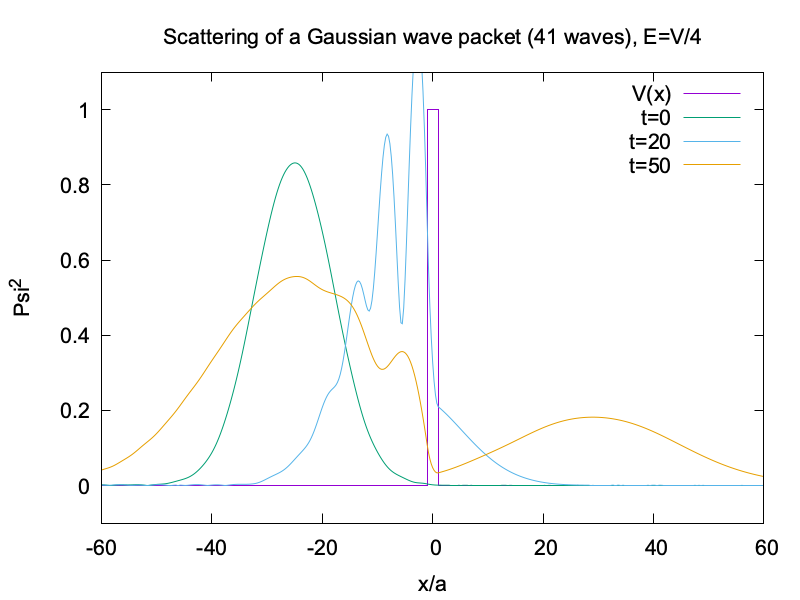

In [12]:
%%gnuplot

# Sets the style for data to lines
set style data line

# Sets the y-range (vertical axis) from -0.1 to 1.1
set yrange [-0.1:1.1]

# Sets the x-range (horizontal axis) from -60 to 60
set xrange [-60:60]

# Sets the label for the horizontal axis
set xlabel "x/a"

# Sets the label for the vertical axis
set ylabel "Psi^2"

# Sets the title of the plot
set title "Scattering of a Gaussian wave packet (41 waves), E=V/4"

# Plots the data
plot \
  'Vo.dat' t "V(x)",\
  '<./packet -v -t 0' title "t=0",\
  '<./packet -v -t 20' title "t=20",\
  '<./packet -v -t 50' title "t=50"

### I have included an explanation in above cells of the following code cells (Notes on Fortran-to-C conversion)

## Notes on Fortran-to-C conversion

Fortran:
<pre>
    real*4      x(601), ...
	complex*8   P(601), ...
	...
	do j = 1,601
	  x(j) = -75 + (j-1)*0.25
	  P(j) = cmplx(0.,0.)
	end do
</pre>

C:
<pre>
...
#include &lt;math.h&gt;
#include &lt;complex.h&gt;

#define NPTS    601       /* these cannot be changed via command-line switches */
#define X_MIN   -75.0
#define X_MAX    75.0
...
  double dx,x[NPTS], ...;
  double complex Psi[NPTS];
...
  dx = (X_MAX-X_MIN)/(double)(NPTS-1);
  for (j=0; j < NPTS; j++) { 
     x[j]=X_MIN + j*dx;
     Psi[j] = (double complex)0.0;  /* start with a blank Psi(x) */
     }
</pre>

Fortran:
<pre>
	I = cmplx(0.,1.)	!complex i

	k1 = sqrt(cmplx(E,0.))
	K2 = sqrt(cmplx(E-1.,0.))

	C1 = -2*k1*K2-k1**2-2*k1*K2*exp(4*I*K2)+exp(4*I*K2)*k1**2
     *	-K2**2+K2**2*exp(4*I*K2)

	b = (k1**2-K2**2)/ C1 *(exp(2*I*(2*K2-k1))-exp(-2*I*k1))
	c = -2*k1*(K2+k1)/ C1 *exp(I*(K2-k1))
	d = (-2*K2+2*k1)*k1/ C1 *exp(I*(-k1+3*K2))
	f = -4*k1*K2/ C1 *exp(2*I*(K2-k1))
</pre>

C:
<pre>
#include &lt;complex.h&gt;
...
  for (i=-n; i < n; i++) {
    p_now = p0 + (double)i * p_step;
    E = p_now*p_now;
    A = A0*exp(-pow((p_now-p0)/(2*s),2))*cexp(-I*(p_now*x0 + E*t));

    k1 = csqrt((double complex)(E));
    k2 = csqrt((double complex)(E-U));
    ce4 = cexp(4*I*k2);
    C1 = -2*k1*k2-k1*k1-2*k1*k2*ce4+ce4*(k1*k1+k2*k2)-k2*k2;

    b = (k1*k1-k2*k2)/ C1 *(cexp(2*I*(2*k2-k1))-cexp(-2*I*k1));
    c = -2*k1*(k2+k1)/ C1 *cexp(I*(k2-k1));
    d = (-2*k2+2*k1)*k1/ C1 *cexp(I*(-k1+3*k2));
    f = -4*k1*k2/ C1 *cexp(2*I*(k2-k1));

    ...
  }
</pre>

Fortran:
<pre>
	do j = 1,296		! left of the barrier, x < -1
	  P(j) = P(j) + A * ( exp(I*k1*x(j)) + b*exp(-I*k1*x(j)) )
	end do
	do j=297,304		! inside the barrier, -1 < x < 1
	  P(j) = P(j) + A * ( c*exp(I*K2*x(j)) + d*exp(-I*K2*x(j)) )
	end do
	do j=305,601		! to the right of the barrier, x > 1
	  P(j) = P(j) + A * f*exp(I*k1*x(j))
	end do
</pre>

C:
<pre>
    for (j=0; j < NPTS; j++) {
       if (x[j] < -1.) {         /* to the left of the barrier, x < -1 */
          Psi[j] += A*( cexp(I*k1*x[j]) + b*cexp(-I*k1*x[j]) );
          }
       else if (x[j] > 1.) {     /* to the right of the barrier, x > 1 */
          Psi[j] += A*f*cexp(I*k1*x[j]);
          }
       else {                    /* inside the barrier, -1 < x < 1 */
          Psi[j] += A*( c*cexp(I*k2*x[j]) + d*cexp(-I*k2*x[j]) );
          }
       }
</pre>